In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
%matplotlib inline
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
import xgboost
import lightgbm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, confusion_matrix, classification_report 
from sklearn.metrics import make_scorer, fbeta_score, auc
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn .model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import pickle
from imblearn.combine import SMOTETomek
from collections import Counter  #for count the 1/0
from imblearn.over_sampling import SMOTE


In [2]:
data=pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Analyse sweetviz  report

In [4]:
my_report=sv.analyze(data)
my_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [5]:
# Number of Columns and Rows in the Dataset
data.shape

(7043, 21)

In [6]:
#Replacing all empty space with NaNs
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
Emp_cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in Emp_cols:
    data[i]=data[i].replace("",np.nan)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Here we see that the totalcharges has 11 missing values. Let's see the complete data corresponding to these customers.

In [11]:
data[np.isnan(data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


1. It can also be noted that the Tenure column is 0 for these entries even though the monthlycharges column is not empty.
2. Let's see if there are any other 0 values in the tenure column.

In [12]:
data[data['tenure'] == 0].index #no additional 0 values.


Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [13]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)

In [14]:
data.shape

(7032, 21)

In [15]:
# Convert String values (Yes and No) of Churn column to 1 and 0
data.loc[data.Churn=='No','Churn'] = 0 
data.loc[data.Churn=='Yes','Churn'] = 1
#convert to integer .
data['Churn']=data['Churn'].astype('int32')

In [16]:
data['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [17]:

data.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, '% of Churn')

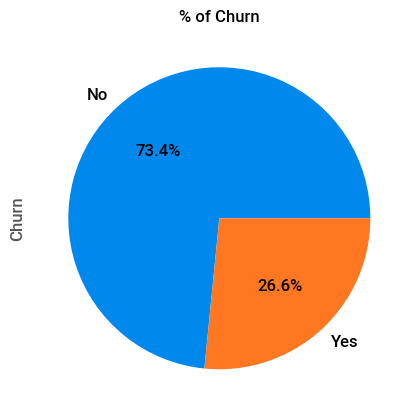

In [18]:
ax = (data['Churn'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('% of Churn', fontsize = 12)

Numerical Features:

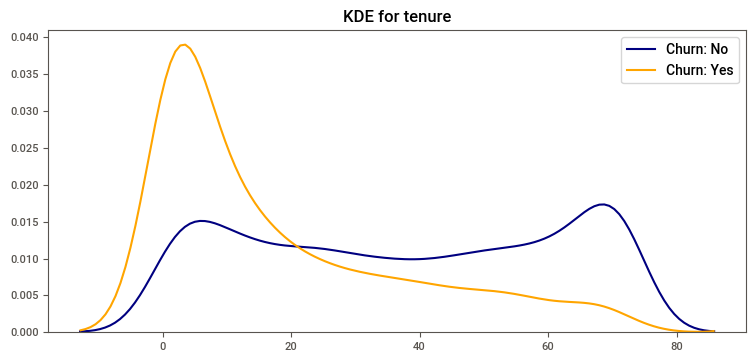

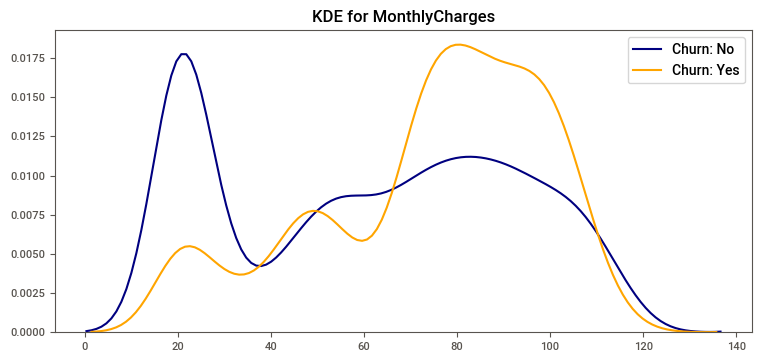

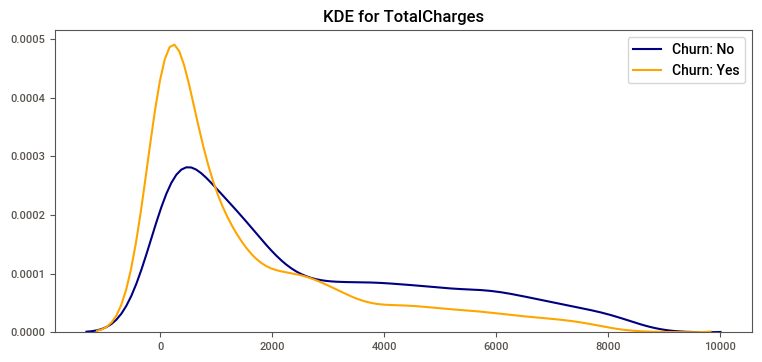

In [19]:
#There are only three numerical columns: tenure, monthly charges and total charges.
#The probability density distribution can be estimate using the seaborn kdeplot function.
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 0][feature], color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 1][feature], color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can conclude that:

1. Recent clients are more likely to churn.
2. Clients with higher MonthlyCharges are also more likely to churn.
3. Tenure and MonthlyCharges are probably important features.

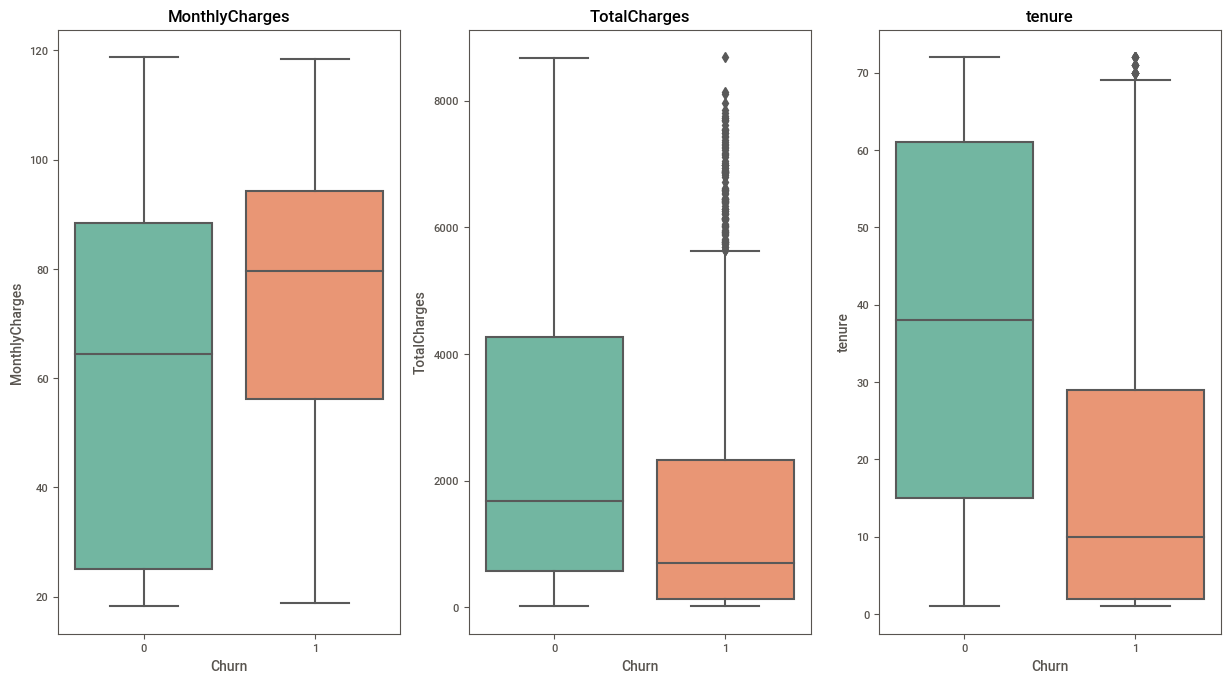

In [20]:
numerical = ["MonthlyCharges", "TotalCharges", "tenure"]

fig, ax = plt.subplots(1, 3, figsize=(15, 8))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x=data["Churn"], y=data[variable], ax=subplot, palette = "Set2").set_title(str(variable))

1. The Monthly plan doesn't seem to be such a big driver of churn, but we can see that 75% of churners pay between 60 and 100 dollars a month
2. One important mark we can see in this plots that 50% of Churners leave the company before the first year goes by.

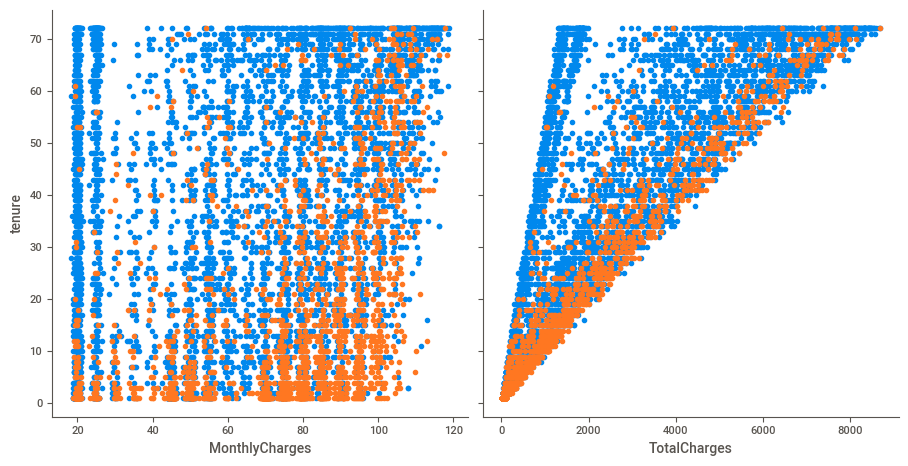

In [21]:
a=sns.PairGrid(data, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn")
ax = a.map(plt.scatter)

# Catagorical:

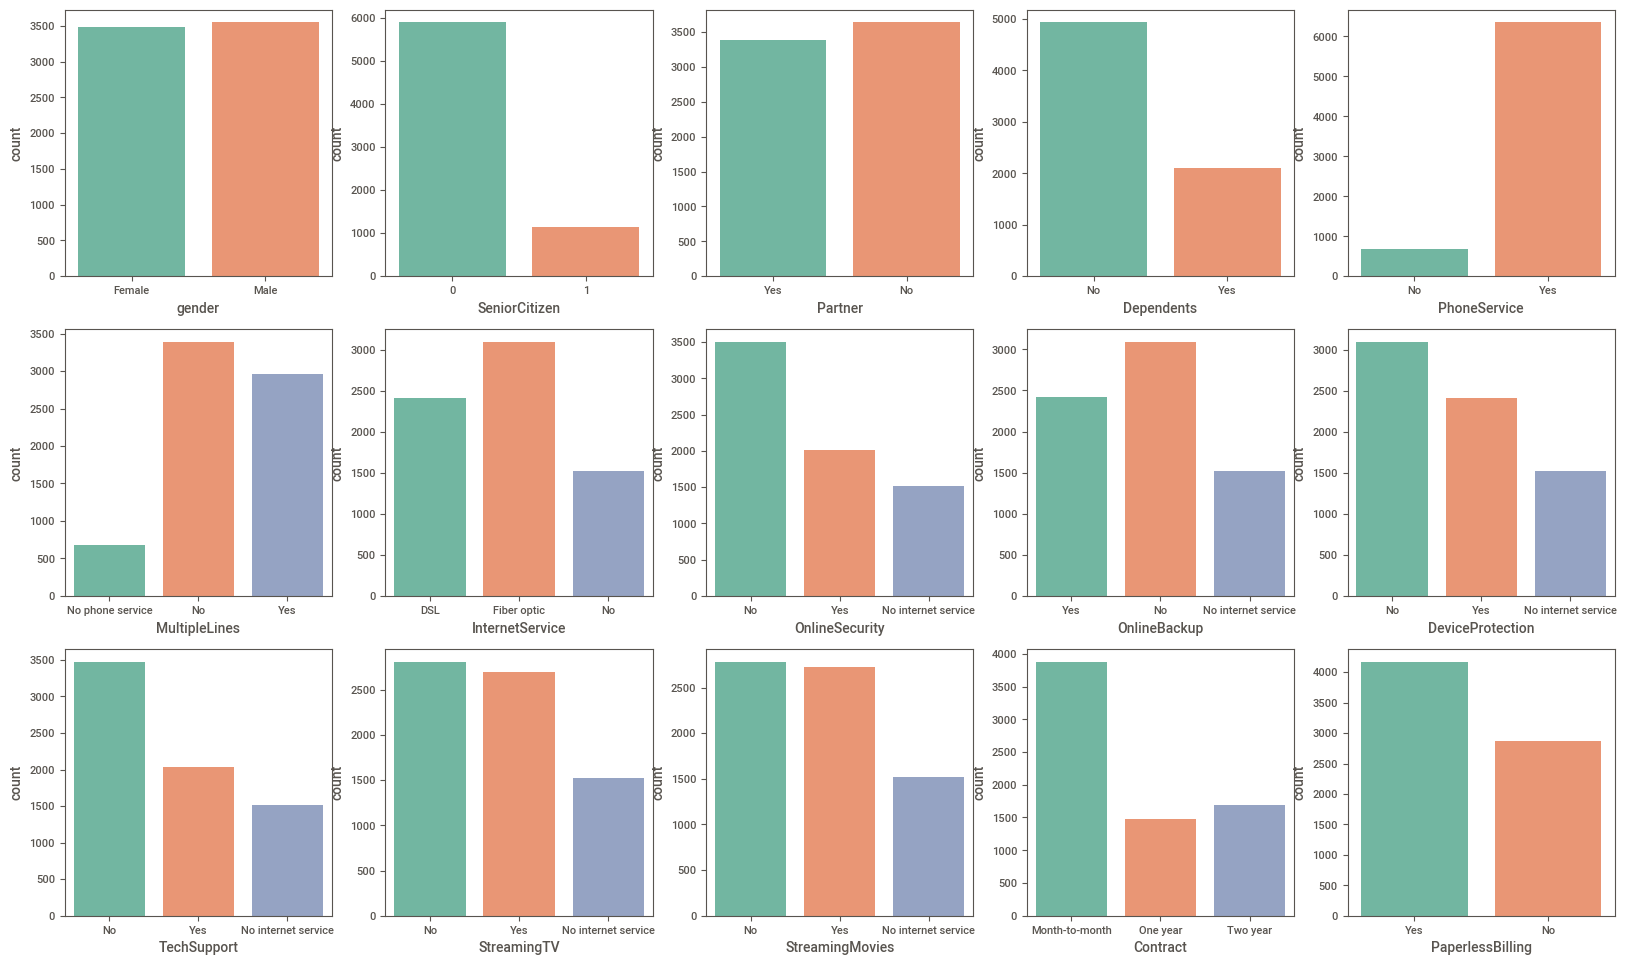

In [22]:
#visualise the distibution of data
categorical = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines",
               "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
               "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",'PaymentMethod']
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot, palette = "Set2")

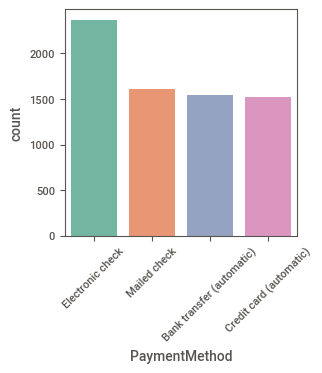

In [23]:
plt.figure(figsize=(3,3))
chart = sns.countplot(data.PaymentMethod, palette = "Set2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

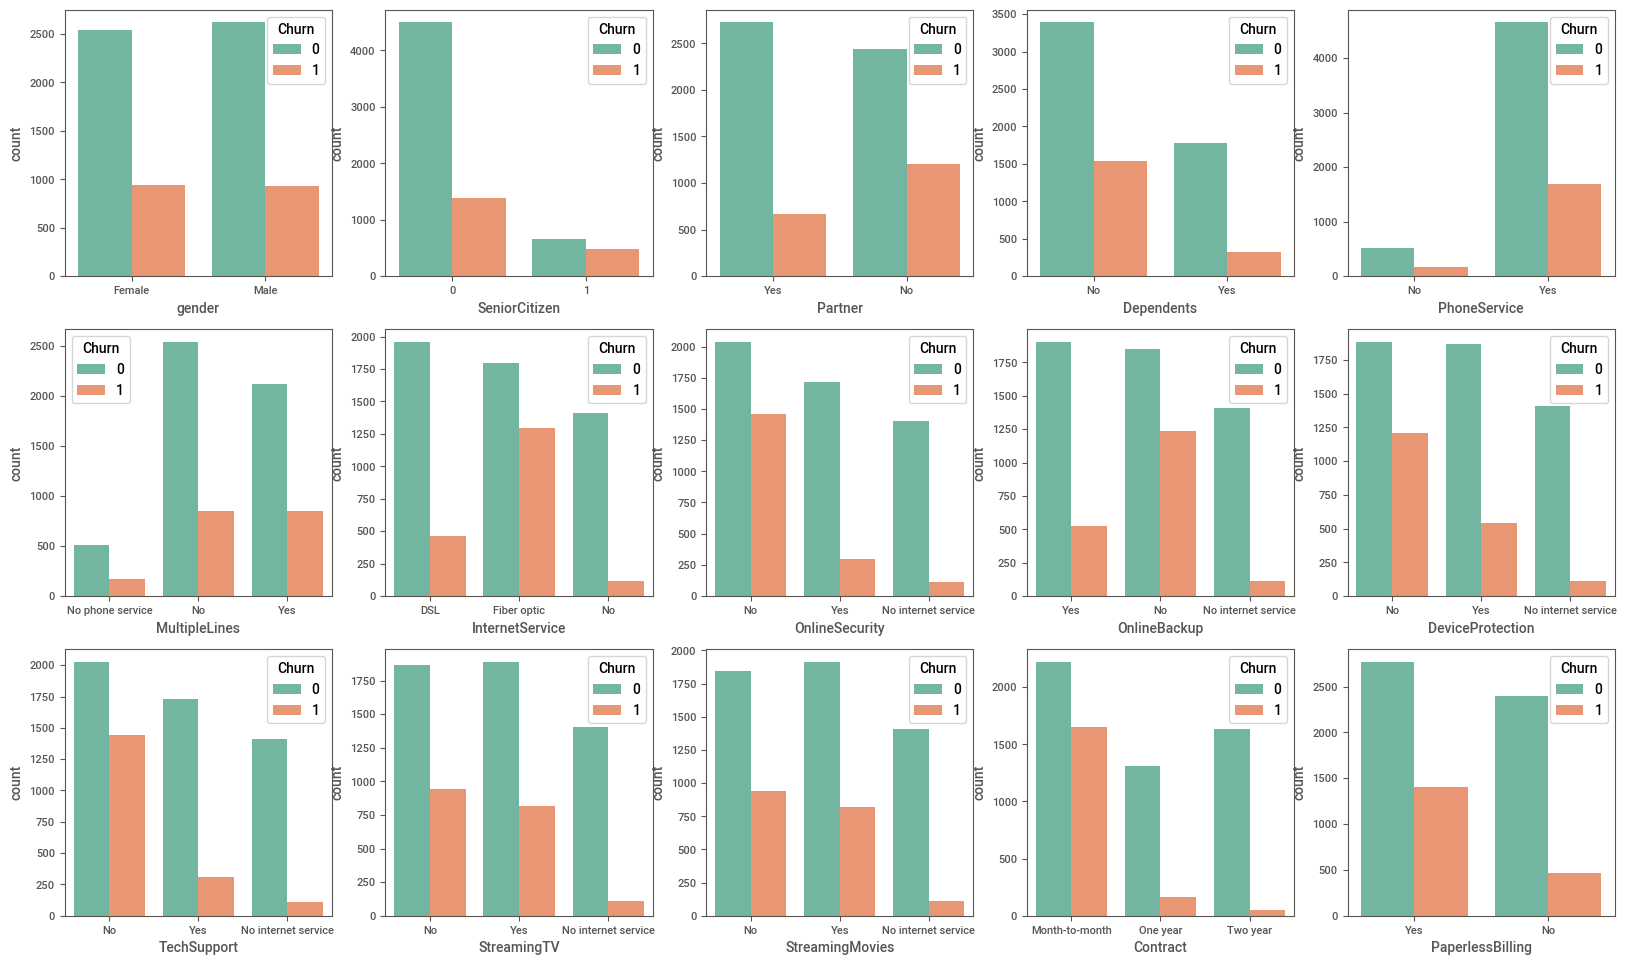

In [24]:
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable],hue=data["Churn"], ax=subplot, palette = "Set2")

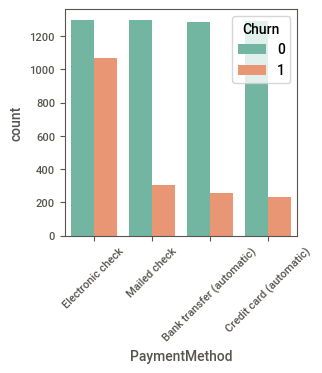

In [25]:
plt.figure(figsize=(3,3))
chart = sns.countplot(data.PaymentMethod,hue=data["Churn"], palette = "Set2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [26]:
def stacked_plot(data, features, target):
    fig, ax = plt.subplots(figsize = (6,4))
    df = (data.groupby([features, target]).size()/data.groupby(features)[target].count()).reset_index().pivot(columns=target, index=features, values=0)
    df.plot(kind='bar', stacked=True, ax = ax, color = ["blue", "orange"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(features)
    ax.set_ylabel('Churn Percentage')

Demographics

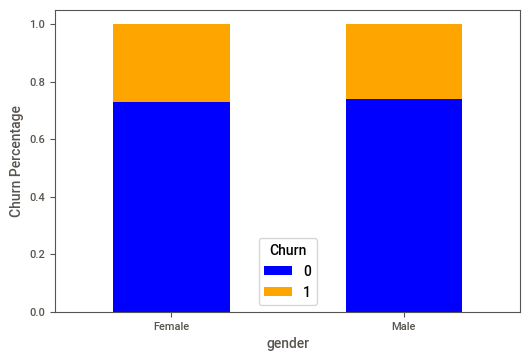

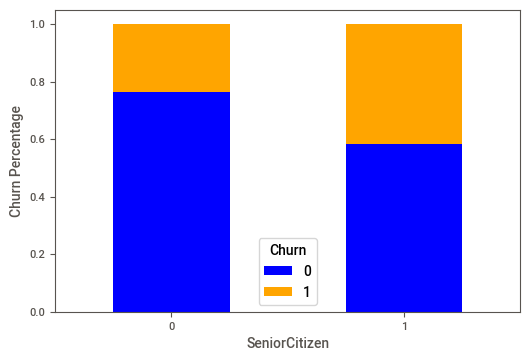

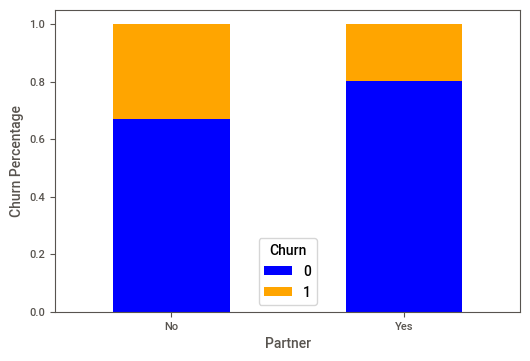

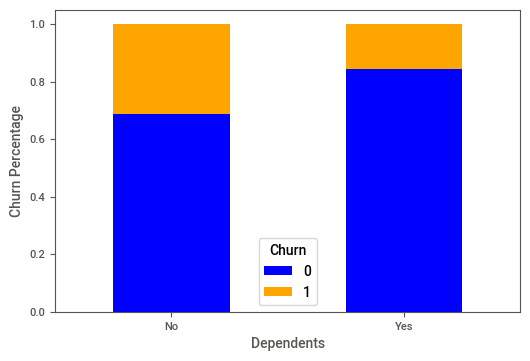

In [27]:
stacked_plot(data, "gender", "Churn")
stacked_plot(data, "SeniorCitizen", "Churn")
stacked_plot(data, "Partner", "Churn")
stacked_plot(data, "Dependents", "Churn")

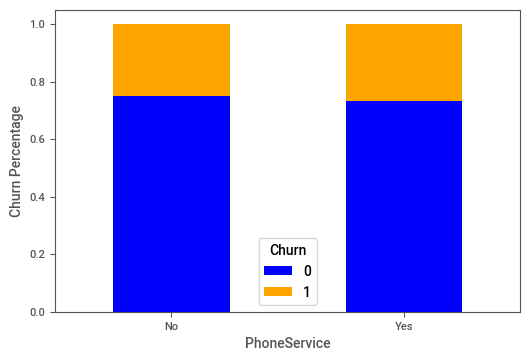

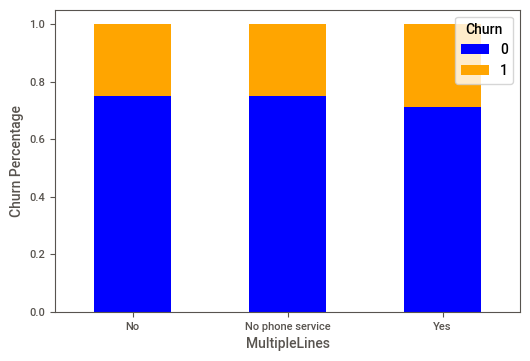

In [28]:
stacked_plot(data, "PhoneService", "Churn")
stacked_plot(data, "MultipleLines", "Churn")

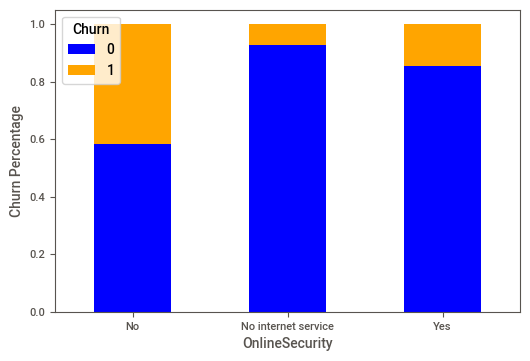

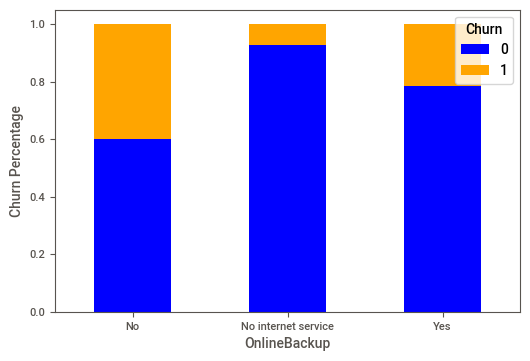

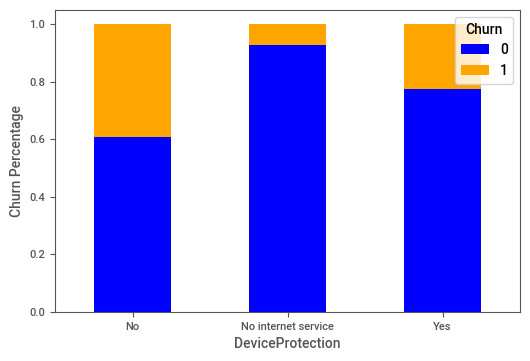

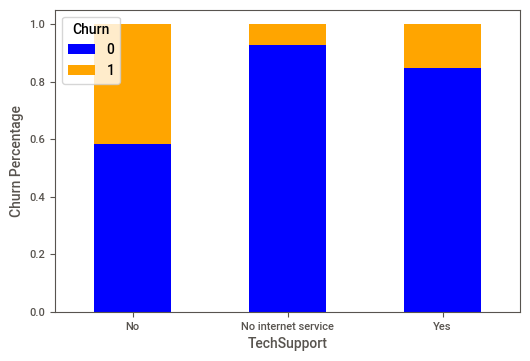

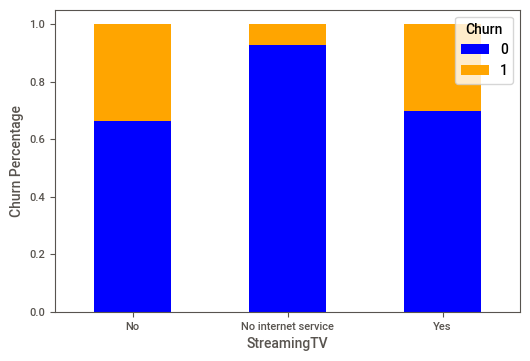

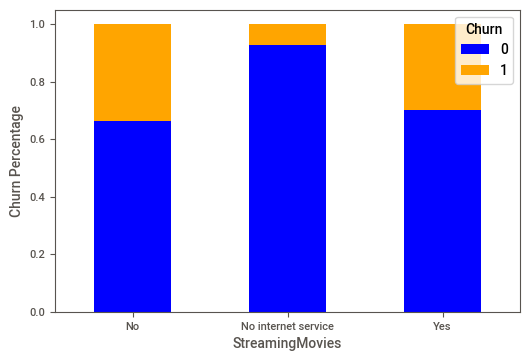

In [29]:
stacked_plot(data, "OnlineSecurity", "Churn")
stacked_plot(data, "OnlineBackup", "Churn")
stacked_plot(data, "DeviceProtection", "Churn")
stacked_plot(data, "TechSupport", "Churn")
stacked_plot(data, "StreamingTV", "Churn")
stacked_plot(data, "StreamingMovies", "Churn")

In [30]:
## phone service, multiple lines, internet service
display(pd.crosstab(data['Churn'], [data['PhoneService'], data['MultipleLines'], data['InternetService']], dropna=False))



PhoneService     No                                                     \
MultipleLines    No                No phone service                Yes   
InternetService DSL Fiber optic No              DSL Fiber optic No DSL   
Churn                                                                    
0                 0           0  0              510           0  0   0   
1                 0           0  0              170           0  0   0   

PhoneService                    Yes                                     \
MultipleLines                    No                   No phone service   
InternetService Fiber optic No  DSL Fiber optic    No              DSL   
Churn                                                                    
0                         0  0  831         628  1077                0   
1                         0  0  216         530   103                0   

PhoneService                                          
MultipleLines                   Yes                   
InternetService Fiber optic No  DSL Fiber optic   No  
Churn                                                 
0                         0  0  616        1171  330  
1                         0  0   73         767   10

In [31]:
## phone service, internet service, seniorcitizen
crosstab_cols = [data['PhoneService'], data['SeniorCitizen'], data['InternetService']]
display(pd.crosstab(data['Churn'], crosstab_cols, dropna=False))


PhoneService      No                                     Yes              \
SeniorCitizen      0                  1                    0               
InternetService  DSL Fiber optic No DSL Fiber optic No   DSL Fiber optic   
Churn                                                                      
0                450           0  0  60           0  0  1326        1361   
1                126           0  0  44           0  0   255         904   

PhoneService                                
SeniorCitizen            1                  
InternetService    No  DSL Fiber optic  No  
Churn                                       
0                1360  121         438  47  
1                 108   34         393   5

In [32]:
## phone service, internet service, gender
crosstab_cols = [data['PhoneService'], data['gender'], data['InternetService']]
display(pd.crosstab(data['Churn'], crosstab_cols, dropna=False))

PhoneService        No                                       Yes              \
gender          Female                Male                Female               
InternetService    DSL Fiber optic No  DSL Fiber optic No    DSL Fiber optic   
Churn                                                                          
0                  249           0  0  261           0  0    716         889   
1                   80           0  0   90           0  0    139         664   

PhoneService                                
gender               Male                   
InternetService   No  DSL Fiber optic   No  
Churn                                       
0                690  731         910  717  
1                 56  150         633   57

In [33]:
## internet service, streamingtv, streamingmovies
crosstab_cols = [data['StreamingTV'], data['StreamingMovies'], data['InternetService']]
display(pd.crosstab(data['Churn'], crosstab_cols))

StreamingTV       No                              No internet service  Yes  \
StreamingMovies   No              Yes             No internet service   No   
InternetService  DSL Fiber optic  DSL Fiber optic                  No  DSL   
Churn                                                                        
0                839         483  292         253                1407  275   
1                273         422   59         188                 113   49   

StreamingTV                                   
StreamingMovies              Yes              
InternetService Fiber optic  DSL Fiber optic  
Churn                                         
0                       246  551         817  
1                       194   78         493

In [34]:
#contract & internet service 
crosstab_cols = [data['Contract'],data['InternetService']]
display(pd.crosstab(data['Churn'], crosstab_cols))

Contract        Month-to-month                  One year                   \
InternetService            DSL Fiber optic   No      DSL Fiber optic   No   
Churn                                                                       
0                          829         966  425      517         435  354   
1                          394        1162   99       53         104    9   

Contract        Two year                   
InternetService      DSL Fiber optic   No  
Churn                                      
0                    611         398  628  
1                     12          31    5

# Check for Outliers in Numerical Features

In [35]:
num_features= ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = data[num_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

No outliers in numerical features detected with the IQR method.

# Feature Engineering

In [36]:
np.corrcoef(data.TotalCharges, data.MonthlyCharges*data.tenure)

array([[1.        , 0.99955986],
       [0.99955986, 1.        ]])

In [37]:
data.drop('TotalCharges', axis = 1, inplace = True) #as correlation is high

Tenure

In [38]:
data['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [39]:
data['tenure'].value_counts().head(10)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: tenure, dtype: int64

In [40]:
#to reduce data complexity make 5 groups
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

data["tenure_group"]=data["tenure"].apply(lambda x: tenure(x))

In [41]:
data.tenure_group.value_counts()

1    2175
6    1407
2    1024
3     832
5     832
4     762
Name: tenure_group, dtype: int64

In [42]:
data.drop('tenure', axis = 1, inplace = True)#drop as tenure_group is created

<AxesSubplot:xlabel='tenure_group', ylabel='count'>

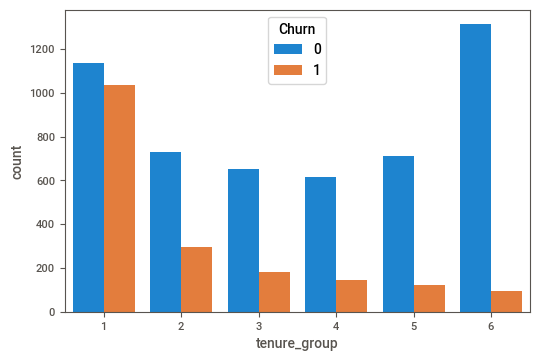

In [43]:
sns.countplot(x="tenure_group", hue="Churn", data=data)

As we can see multiplelines and phoneservice do not add value in the model having similar churn rate. This also holds true in the log-rank test of survival analysis. So, I will drop them

In [44]:
data.drop(['MultipleLines', 'PhoneService',], axis = 1, inplace = True)

In [45]:
data.drop(['gender'],axis=1,inplace= True) #gender is also notimportance

In [46]:
data.drop(['customerID'],axis=1,inplace= True)

In [47]:
data.Partner = data.Partner.apply(lambda x: 0 if x == "No" else 1)
data.Dependents = data.Dependents.apply(lambda x: 0 if x == "No" else 1)
data.PaperlessBilling = data.PaperlessBilling.apply(lambda x: 0 if x == "No" else 1)

data = pd.get_dummies(data, columns=['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first=True)
data.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,Churn,tenure_group,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,29.85,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,56.95,0,3,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,1,53.85,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,42.30,0,4,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,1,70.70,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# Feature Selection

Feature Importance

In [48]:
#Create Feature variable X and Target variable y
X = data.drop(['Churn'], axis = 1)
y = data['Churn']

In [49]:
#Feature selection by Random forest classifier
clf=RandomForestClassifier()
clf.fit(X,y)

RandomForestClassifier()

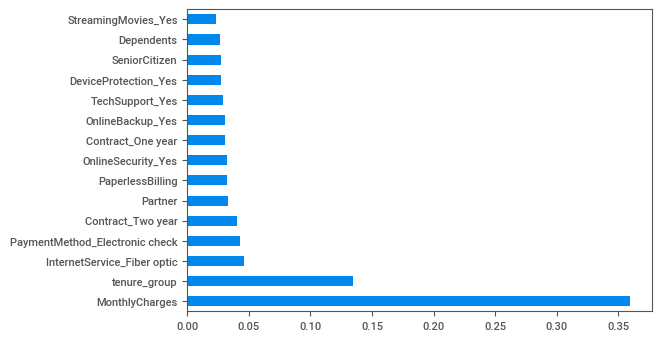

In [50]:
#plot 15 importance features
ranked_features=pd.Series(clf.feature_importances_,index=X.columns)
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

# Correlation Analysis

In [51]:
#correlation
correlation = data.corr()


In [52]:
correlation

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,Churn,tenure_group,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016957,-0.210550,0.156258,0.219874,0.150541,0.016019,0.254923,-0.182519,-0.182519,...,-0.060577,-0.182519,0.105445,-0.182519,0.119842,-0.046491,-0.116205,-0.024359,0.171322,-0.152987
Partner,0.016957,1.000000,0.452269,-0.013957,0.097825,-0.149982,0.369851,0.001235,-0.000286,-0.000286,...,0.120206,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,0.082327,-0.083207,-0.096948
Dependents,-0.210550,0.452269,1.000000,-0.110131,-0.112343,-0.163128,0.157483,-0.164101,0.138383,0.138383,...,0.063053,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,0.061134,-0.149274,0.056448
PaperlessBilling,0.156258,-0.013957,-0.110131,1.000000,0.351930,0.191454,0.003666,0.326470,-0.320592,-0.320592,...,0.037536,-0.320592,0.224241,-0.320592,0.211583,-0.052278,-0.146281,-0.013726,0.208427,-0.203981
MonthlyCharges,0.219874,0.097825,-0.112343,0.351930,1.000000,0.192858,0.241889,0.787195,-0.763191,-0.763191,...,0.338301,-0.763191,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.030055,0.271117,-0.376568
Churn,0.150541,-0.149982,-0.163128,0.191454,0.192858,1.000000,-0.340311,0.307463,-0.227578,-0.227578,...,-0.164716,-0.227578,0.063254,-0.227578,0.060860,-0.178225,-0.301552,-0.134687,0.301455,-0.090773
tenure_group,0.016019,0.369851,0.157483,0.003666,0.241889,-0.340311,1.000000,0.019207,-0.037761,-0.037761,...,0.316890,-0.037761,0.273229,-0.037761,0.278135,0.206175,0.548194,0.227527,-0.204743,-0.226183
InternetService_Fiber optic,0.254923,0.001235,-0.164101,0.326470,0.787195,0.307463,0.019207,1.000000,-0.465736,-0.465736,...,-0.020299,-0.465736,0.329744,-0.465736,0.322457,-0.076809,-0.209965,-0.050552,0.335763,-0.305984
InternetService_No,-0.182519,-0.000286,0.138383,-0.320592,-0.763191,-0.227578,-0.037761,-0.465736,1.000000,1.000000,...,-0.335695,1.000000,-0.414951,1.000000,-0.418450,0.038061,0.217542,0.001870,-0.284608,0.319694
OnlineSecurity_No internet service,-0.182519,-0.000286,0.138383,-0.320592,-0.763191,-0.227578,-0.037761,-0.465736,1.000000,1.000000,...,-0.335695,1.000000,-0.414951,1.000000,-0.418450,0.038061,0.217542,0.001870,-0.284608,0.319694


<AxesSubplot:>

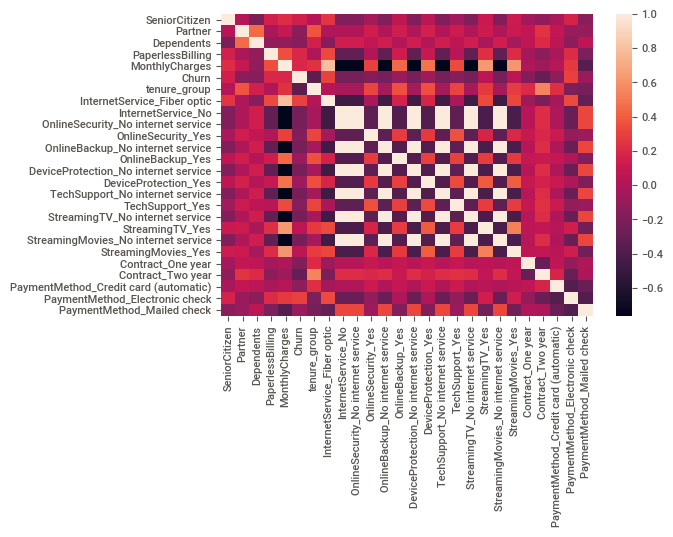

In [53]:
sns.heatmap(data.corr())

In [54]:
threshold=0.8

In [55]:
#find correlated Features
def correlation(data, threshold):
    col_corr=set()   #set all correlated col names
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:  #we are interested in absoulute coeff value
                colname= corr_matrix.columns[i]   #get the name of col
                col_corr.add(colname)
    return col_corr            
                
            

In [56]:
correlation(data.iloc[:,:],threshold)

{'DeviceProtection_No internet service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service'}

In [57]:
data.drop(['DeviceProtection_No internet service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service'],axis=1,inplace= True)#Remove  highly corelated Features.

In [58]:
#variables for training
X = data.drop(['Churn'], axis = 1)
y = data['Churn']

In [59]:
X.shape

(7032, 19)

<AxesSubplot:>

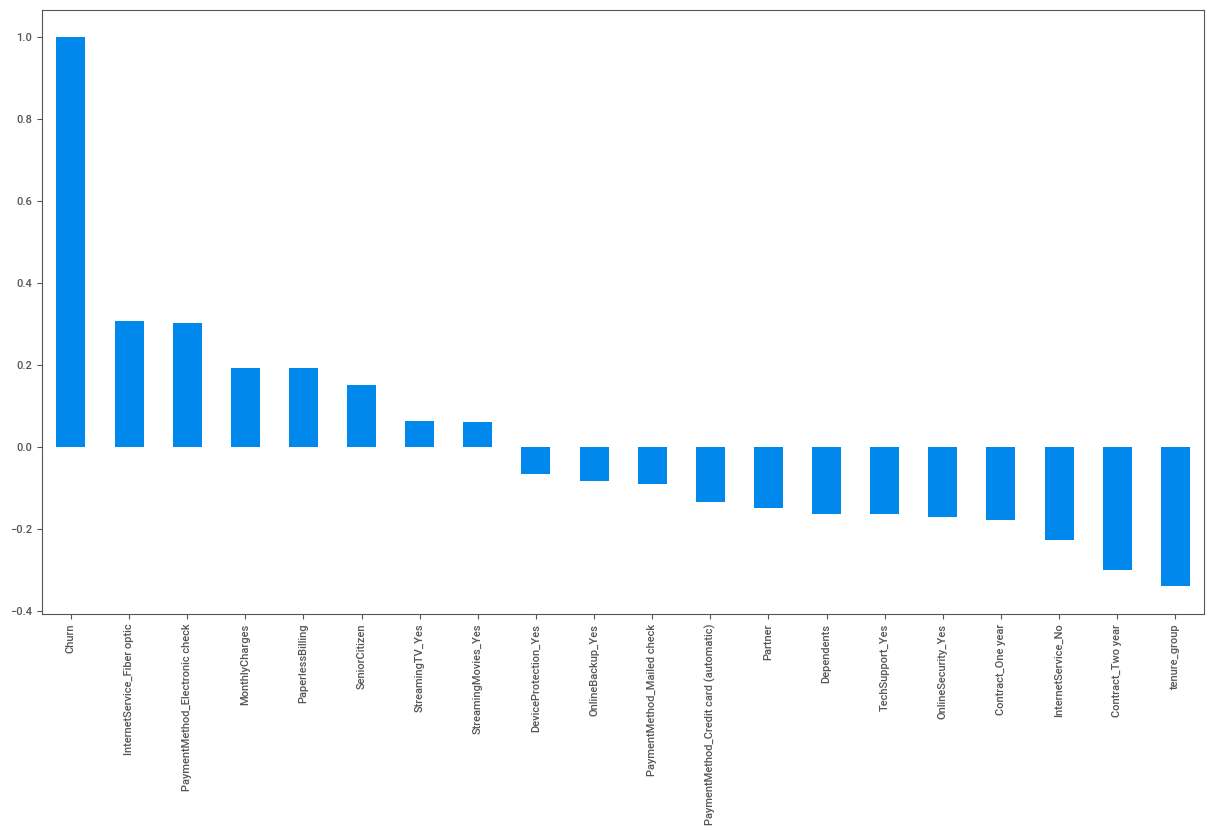

In [60]:
plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [61]:
from sklearn.feature_selection import mutual_info_classif

In [62]:
mutual_info=mutual_info_classif(X,y)

In [63]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

tenure_group                             0.065397
Contract_Two year                        0.058927
MonthlyCharges                           0.050311
InternetService_Fiber optic              0.048393
PaymentMethod_Electronic check           0.047108
InternetService_No                       0.031220
Partner                                  0.019185
Contract_One year                        0.016167
TechSupport_Yes                          0.015684
PaperlessBilling                         0.014593
Dependents                               0.014146
PaymentMethod_Credit card (automatic)    0.013699
OnlineSecurity_Yes                       0.012926
StreamingTV_Yes                          0.008836
DeviceProtection_Yes                     0.006094
PaymentMethod_Mailed check               0.005186
SeniorCitizen                            0.004154
OnlineBackup_Yes                         0.000272
StreamingMovies_Yes                      0.000000
dtype: float64

In [64]:
data.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,Churn,tenure_group,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,29.85,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,56.95,0,3,0,0,1,0,1,0,0,0,1,0,0,0,1
2,0,0,0,1,53.85,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,42.30,0,4,0,0,1,0,1,1,0,0,1,0,0,0,0
4,0,0,0,1,70.70,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0


# PCA

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

In [67]:
X_pca.shape

(7032, 2)

Text(0, 0.5, 'Second principal components')

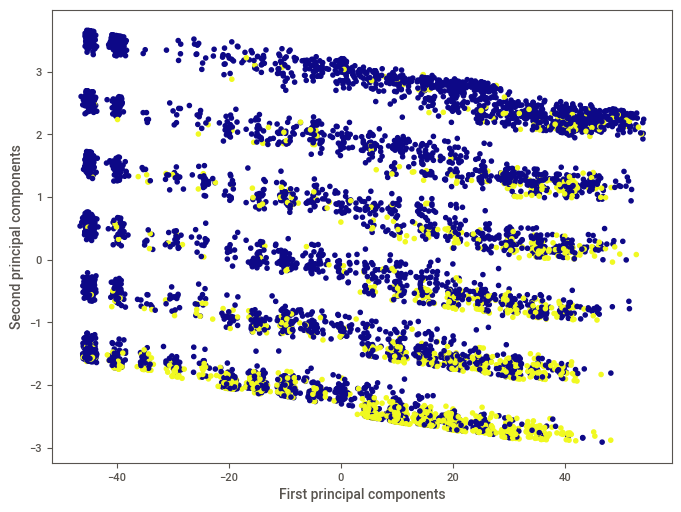

In [68]:
#Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='plasma')
plt.xlabel('First principal components')
plt.ylabel('Second principal components')
#yellow=Churn

We see six tilted clusters because of tenure group in our model

Train Test split

In [69]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [70]:
X_train_Nm,X_test_Nm,y_train_Nm,y_test_Nm=train_test_split(X,y,train_size=0.8,random_state=0)#for over sampling cheak

In [71]:
#scaling for train SVM & KNN Classifier
scaler=MinMaxScaler().fit(X_train,y_train)
X_train_scaled=scaler.transform(X_train)
pd.DataFrame(X_train_scaled,columns=X_train.columns).head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,tenure_group,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,1.0,0.399005,0.2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.949254,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.070647,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.011940,0.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.655721,0.2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Define Fuctions For Model Evaluation Metrics
    

In [232]:
#define a function that plot feature wt for a classifier
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind='bar')
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    top_weights_selected.plot(kind='bar')


In [191]:
#define a function that plot confusion matrix for a classifier and accuracy score
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=['No Churn', 'churn'], cmap=plt.cm.Blues,
 normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()
                          
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=['No Churn', 'churn'], cmap=plt.cm.Blues,
 normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy score Train: {classifier.score(X_train, y_train)}(as comparision)')
    return print("")

In [192]:
#Define a function that plot ROC curve & AUC Score
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')
    

In [193]:
#define a function for precision, recall- curve & f1 score
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    

    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

# Cross Validation Like KFOLD and Hyperpaqrameter Tuning in Imbalance data

# Logistic Regression Imbalaced

In [72]:
#recal=make_scorer(recall_score)

In [73]:
logit=LogisticRegression(random_state=50)

grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=10,random_state=None,shuffle=False)

In [74]:
logit=GridSearchCV(logit,grid,cv=cv,n_jobs=-1,scoring='recall')
logit.fit(X_train,y_train)

C:\Users\Soumit\anaconda3\envs\C_churn\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=50), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [75]:
y_pred=logit.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[924 114]
 [180 189]]
0.7910447761194029
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1038
           1       0.62      0.51      0.56       369

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

0.7011842661779218


In [186]:
y_pred_prob = logit.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic test roc-auc: 0.8244591694471858


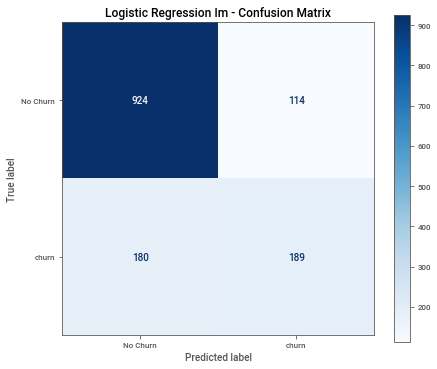

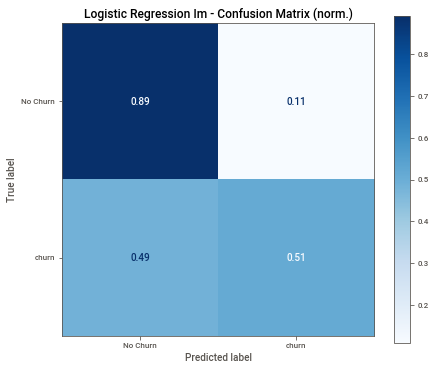

Accuracy Score Test: 0.7668798862828714
Accuracy score Train: 0.5406666666666666(as comparision)



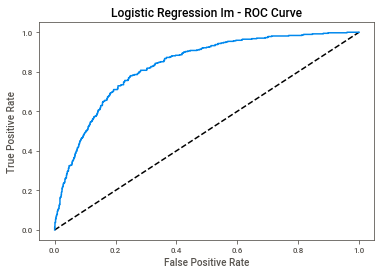

AUC Score (ROC): 0.8317720653121753



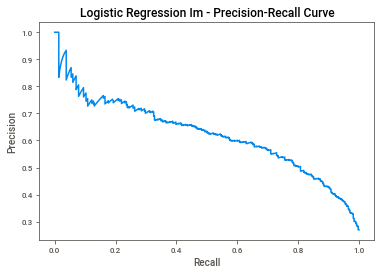

F1 score: 0.6067146282973621 
AUC Score (PR): 0.6226857310573799



In [235]:
#plot Model evaluation
confusion_matrix_plot(X_train, y_train, X_test, y_test, logit, y_pred,'Logistic Regression Im')
roc_curve_auc_score(X_test, y_test, y_pred_prob,'Logistic Regression Im')
precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_prob,'Logistic Regression Im')

# Oversampling

In [76]:
from imblearn.combine import SMOTETomek
from collections import Counter  #for count the 1/0
from imblearn.over_sampling import SMOTE

In [77]:
os=SMOTETomek(0.7)
X_train_Tk,y_train_Tk=os.fit_sample(X_train,y_train)
print("The num of classes before fit {}".format(Counter(y_train)))
print("the num of classes after fit {}".format(Counter(y_train_Tk)))

C:\Users\Soumit\anaconda3\envs\C_churn\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The num of classes before fit Counter({0: 4125, 1: 1500})
the num of classes after fit Counter({0: 3943, 1: 2705})


In [78]:
os=SMOTETomek(0.8)
X_train_Nm_Ov,y_train_Ov=os.fit_sample(X_train,y_train)
print("The num of classes before fit {}".format(Counter(y_train)))
print("the num of classes after fit {}".format(Counter(y_train_Ov)))

The num of classes before fit Counter({0: 4125, 1: 1500})
the num of classes after fit Counter({0: 3973, 1: 3148})


C:\Users\Soumit\anaconda3\envs\C_churn\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [79]:
# Oversample using SMOTE
sampler = SMOTE(random_state=100, k_neighbors=7)
X_train_SM,y_train_SM = sampler.fit_resample(X_train, y_train)
print("The num of classes before fit {}".format(Counter(y_train)))
print("the num of classes after fit {}".format(Counter(y_train_SM)))

The num of classes before fit Counter({0: 4125, 1: 1500})
the num of classes after fit Counter({0: 4125, 1: 4125})


<AxesSubplot:ylabel='Density'>

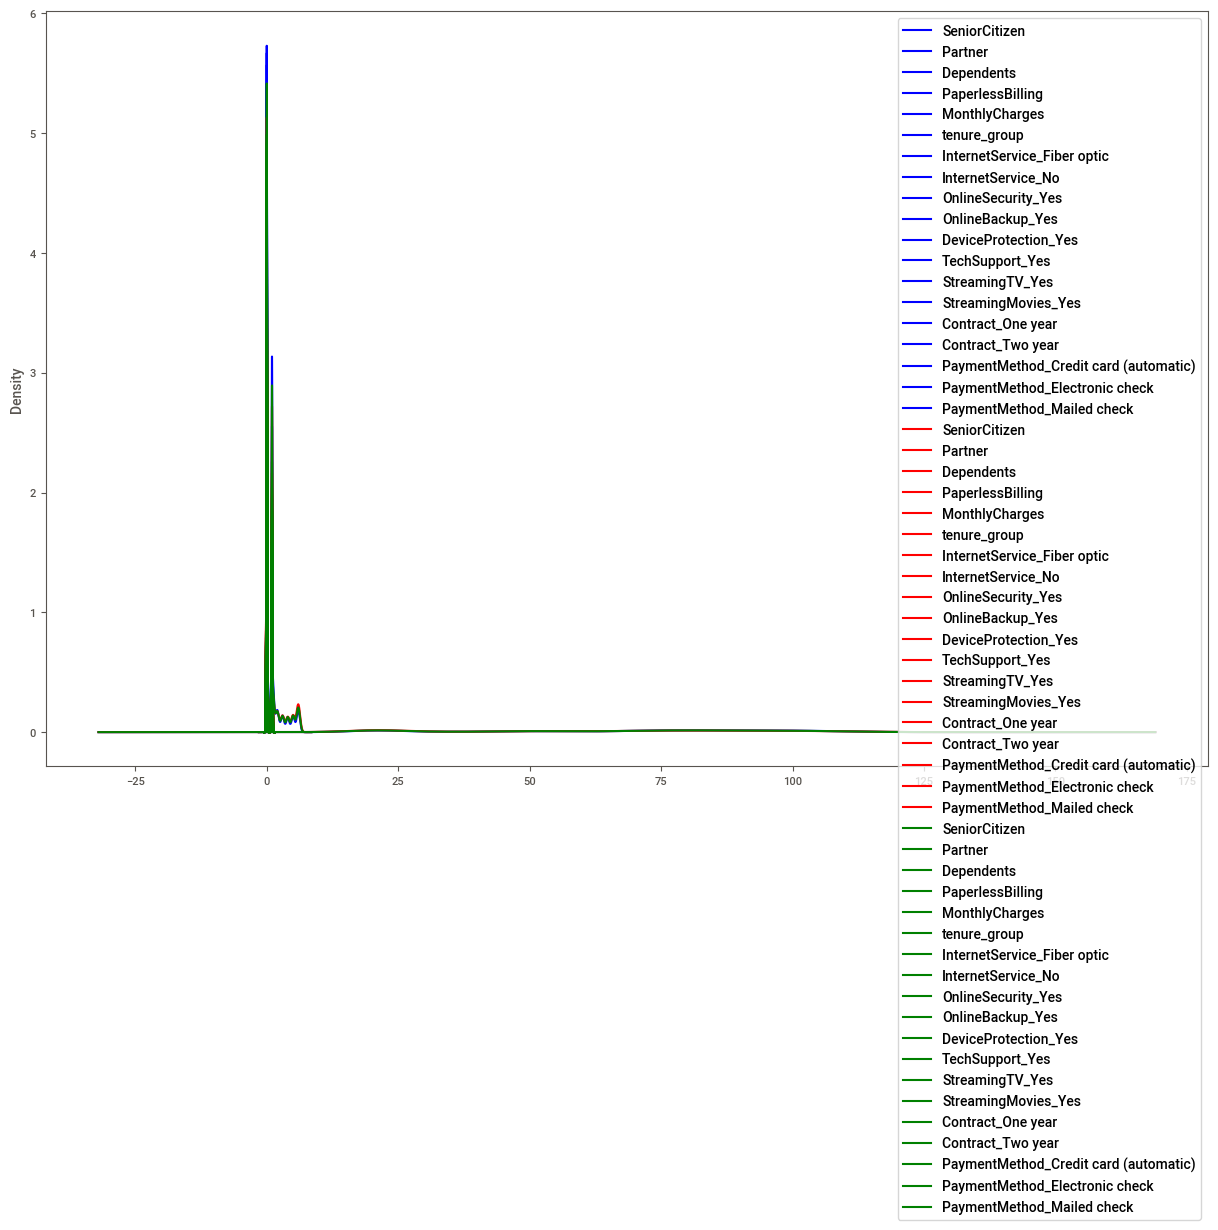

In [80]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
X_train_SM.plot(kind='kde', ax=ax,color='blue')
X_train.plot(kind='kde', ax=ax, color='red')
X_train_Tk.plot(kind='kde', ax=ax, color='green')
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels, loc='best')

# Random Forest

In [81]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 15, 20, 30],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [20,50,100, 200, 300]
}
# Create a based model
rf_C = RandomForestClassifier()
# Instantiate the grid search model
RF_model = GridSearchCV(estimator = rf_C, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
RF_model .fit(X_train_Tk,y_train_Tk)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  4.7min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15, 20, 30],
                         'max_features': ['auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [20, 50, 100, 200, 300]},
             verbose=2)

In [82]:
RF_model.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [83]:
rf_model=RandomForestClassifier(class_weight={0:1, 1:3}, max_depth = 10,random_state=1,
                                  n_estimators=500, oob_score=True, min_samples_leaf=6, min_samples_split=8)

In [84]:
rf_model .fit(X_train_Tk,y_train_Tk)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=10,
                       min_samples_leaf=6, min_samples_split=8,
                       n_estimators=500, oob_score=True, random_state=1)

In [85]:
y_pred=rf_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[681 357]
 [ 49 320]]
0.7114427860696517
              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1038
           1       0.47      0.87      0.61       369

    accuracy                           0.71      1407
   macro avg       0.70      0.76      0.69      1407
weighted avg       0.81      0.71      0.73      1407

0.7616390181242852


In [139]:
ytrain_pred = rf_model.predict_proba(X_train_Tk)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
y_pred_rf_prob = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.922212554783671
RF test roc-auc: 0.8244591694471858


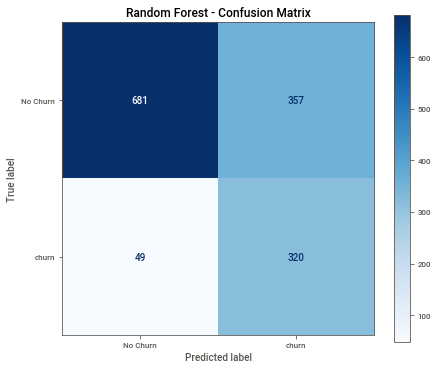

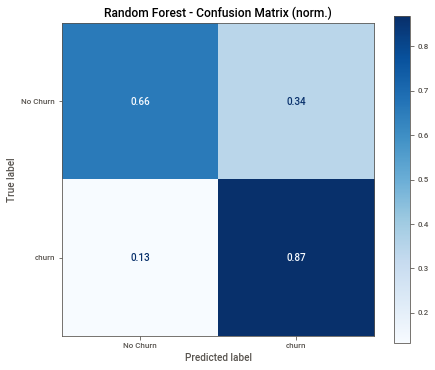

Accuracy Score Test: 0.7547974413646056
Accuracy score Train: 0.8041516245487365(as comparision)



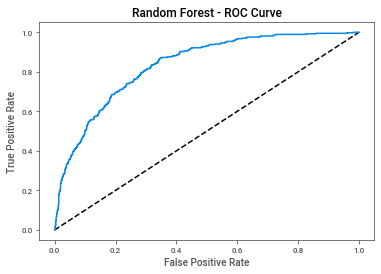

AUC Score (ROC): 0.8343163055908016



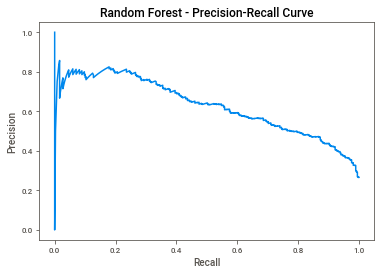

F1 score: 0.5548387096774193 
AUC Score (PR): 0.627076181352386



In [189]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, rf_model, y_pred,'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob,'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_rf_prob,'Random Forest')


# Logistic regression

In [88]:
log_s=LogisticRegression(random_state=50)

grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=10,random_state=None,shuffle=False)

In [89]:
log_S=GridSearchCV(log_s,grid,cv=cv,n_jobs=-1,scoring='recall')
log_S.fit(X_train_Tk,y_train_Tk)

C:\Users\Soumit\anaconda3\envs\C_churn\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=50), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [90]:
y_pred=log_S.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[832 206]
 [114 255]]
0.7725657427149965
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1038
           1       0.55      0.69      0.61       369

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.79      0.77      0.78      1407

0.746299168193994


In [183]:
#ytrain_pred = log_S.predict_proba(X_train_Tk)
#print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred)))
ytest_pred_prob = log_S.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic test roc-auc: 0.8244591694471858


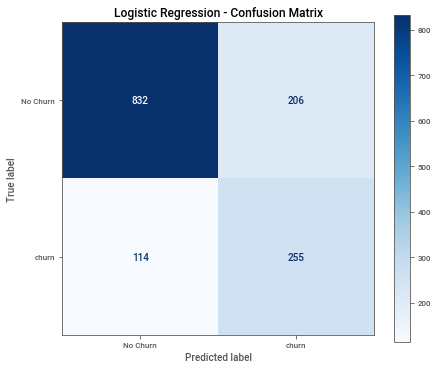

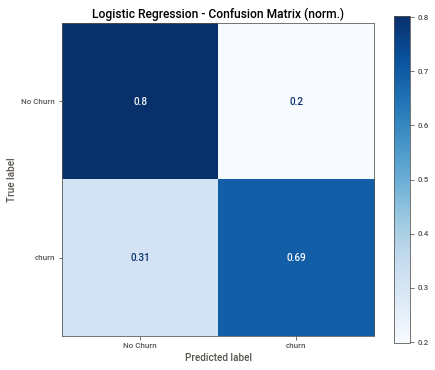

Accuracy Score Test: 0.7547974413646056
Accuracy score Train: 0.7744916820702403(as comparision)



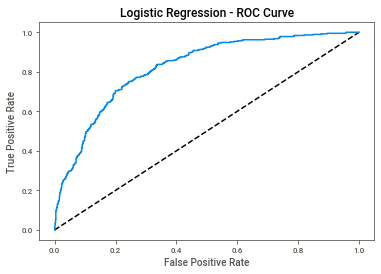

AUC Score (ROC): 0.8215794393011369



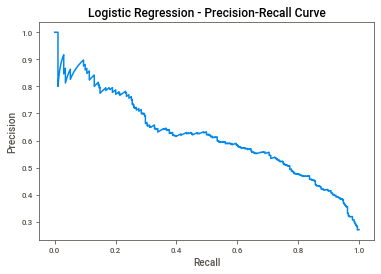

F1 score: 0.5548387096774193 
AUC Score (PR): 0.6176344199270805



In [184]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, log_S, y_pred,'Logistic Regression')
roc_curve_auc_score(X_test, y_test, ytest_pred_prob,'Logistic Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred, ytest_pred_prob,'Logistic Regression')

# Ridge Classifier

In [92]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier(class_weight='balanced', random_state=42)
RC=rc.fit(X_train_Tk,y_train_Tk)

In [93]:
y_pred=RC.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[749 289]
 [ 85 284]]
0.7341862117981521
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1038
           1       0.50      0.77      0.60       369

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407

0.7456138289706598


# Decission Tree

In [94]:
param_g = {
    'max_depth': [8, 15, 30, 50],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}
    
ds=DecisionTreeClassifier()
ds = GridSearchCV(estimator = ds, param_grid = param_g, 
                          cv = 10, n_jobs = -1, verbose = 2)
ds.fit(X_train_Tk,y_train_Tk)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    4.1s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 15, 30, 50], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=2)

In [95]:
y_pred=ds.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[840 198]
 [148 221]]
0.7540867093105899
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1038
           1       0.53      0.60      0.56       369

    accuracy                           0.75      1407
   macro avg       0.69      0.70      0.70      1407
weighted avg       0.77      0.75      0.76      1407

0.7040822720365932


In [195]:
ytrain_pred_prob = ds.predict_proba(X_train_Tk)
print('DecisionTree train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred_prob = ds.predict_proba(X_test)
print('DecisionTree test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

DecisionTree train roc-auc: 0.922212554783671
DecisionTree test roc-auc: 0.8244591694471858


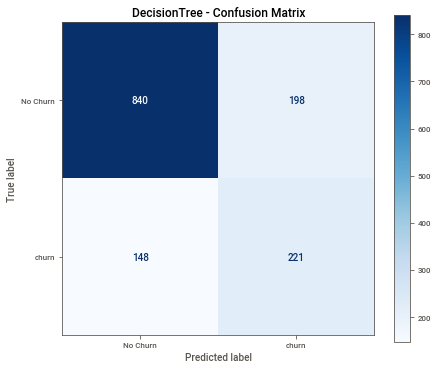

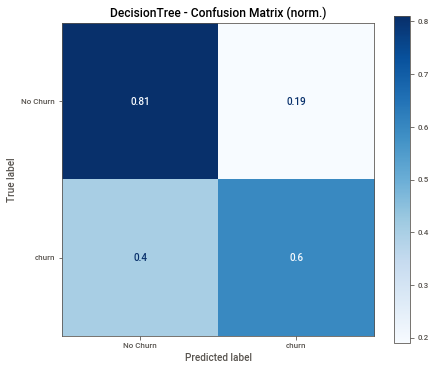

Accuracy Score Test: 0.7547974413646056
Accuracy score Train: 0.832280385078219(as comparision)



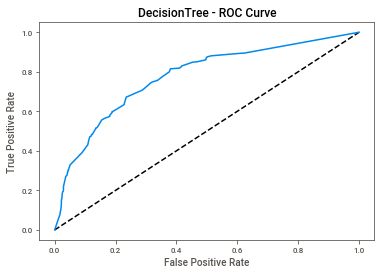

AUC Score (ROC): 0.774550809091906



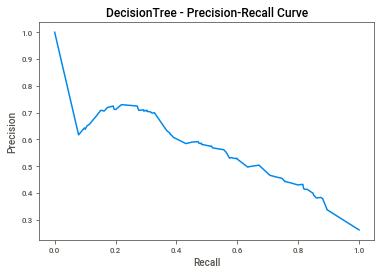

F1 score: 0.5548387096774193 
AUC Score (PR): 0.5631417692678737



In [196]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, ds, y_pred,'DecisionTree')
roc_curve_auc_score(X_test, y_test, ytest_pred_prob,'DecisionTree')
precision_recall_curve_and_scores(X_test, y_test, y_pred, ytest_pred_prob,'DecisionTree')

# Naive Bayes

In [97]:
gnb = GaussianNB()
NB=gnb.fit(X_train_Tk,y_train_Tk)


In [98]:
y_pred=NB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[768 270]
 [ 97 272]]
0.7391613361762616
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1038
           1       0.50      0.74      0.60       369

    accuracy                           0.74      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.74      0.75      1407

0.7385058821686483


In [99]:
ytrain_pred = NB.predict_proba(X_train_Tk)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred = NB.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.8717553698428109
Logistic test roc-auc: 0.8148252580791705


# Bagging Classifier

In [100]:
from sklearn.ensemble.bagging import BaggingClassifier
bgc = BaggingClassifier(random_state=124)
BGC=bgc.fit(X_train_Tk,y_train_Tk)

C:\Users\Soumit\anaconda3\envs\C_churn\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [101]:
y_pred=BGC.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[896 142]
 [179 190]]
0.7718550106609808
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1038
           1       0.57      0.51      0.54       369

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407

0.6890518038128358


# XGboost

In [102]:
#hyperparameter tuning
params={
    'learning_rate'   : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth'       : [3,4,5,6,8,10,12],
    'min_child_weight': [1,3,5,7],
    'gamma'           : [0.0, 0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}

In [103]:
Xgcls=xgboost.XGBClassifier()
random_XGB_Ns=RandomizedSearchCV(Xgcls,param_distributions=params,scoring='accuracy',cv=10,verbose=3)
random_XGB_Ns.fit(X_train_Tk,y_train_Tk)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4, score=0.791, total=   1.4s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4, score=0.785, total=   0.3s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV]  min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4, score=0.768, total=   0.3s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4 
[CV]  min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4, score=0.744, total=   0.2s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4 
[CV]  min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4, score=0.765, total=   0.2s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4 
[CV]  min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4, score=0.875, total=   0.3s
[CV] min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4 
[CV]  min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.4, score=0.875, total=   0.3s
[CV] min_child_weight=1, max_depth=8, lea

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.4s finished


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [104]:
random_XGB_Ns.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
y_pred=random_XGB_Ns.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[866 172]
 [161 208]]
0.7633262260127932
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1038
           1       0.55      0.56      0.56       369

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.76      0.76      1407

0.6989911806632517


In [198]:
ytrain_pred = random_XGB_Ns.predict_proba(X_train_Tk)
print('XGB train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred_prob = random_XGB_Ns.predict_proba(X_test)
print('XGB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

XGB train roc-auc: 0.9984694559206212
XGB test roc-auc: 0.8244591694471858


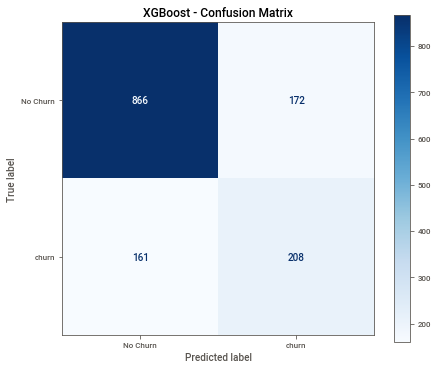

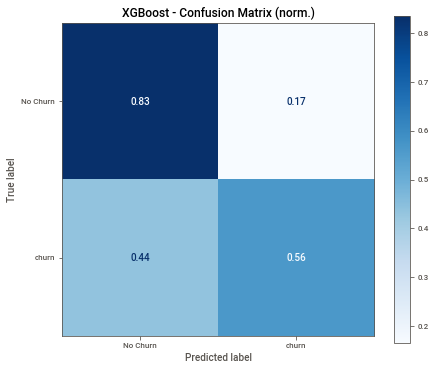

Accuracy Score Test: 0.7547974413646056
Accuracy score Train: 0.9811973525872443(as comparision)



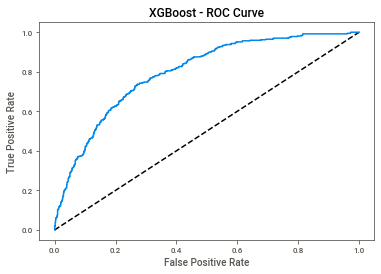

AUC Score (ROC): 0.7974620256799871



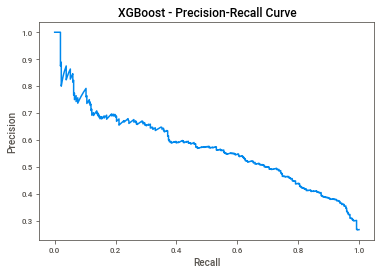

F1 score: 0.5548387096774193 
AUC Score (PR): 0.5733264724059022



In [199]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, random_XGB_Ns, y_pred,'XGBoost')
roc_curve_auc_score(X_test, y_test, ytest_pred_prob,'XGBoost')
precision_recall_curve_and_scores(X_test, y_test, y_pred, ytest_pred_prob,'XGBoost')

# LightGBM

In [107]:
gbm = lightgbm.LGBMClassifier(objective='binary',
                        num_leaves=31,
                        metric = 'l2',
                        learning_rate=0.2,
                        n_estimators=5)
gbm.fit(X_train_Tk, y_train_Tk)
        

LGBMClassifier(learning_rate=0.2, metric='l2', n_estimators=5,
               objective='binary')

In [108]:
y_pred=gbm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[887 151]
 [144 225]]
0.7903340440653873
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1038
           1       0.60      0.61      0.60       369

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407

0.7321420179519714


In [109]:
ytrain_pred = gbm.predict_proba(X_train_Tk)
print('L_GB train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred = gbm.predict_proba(X_test)
print('L_GB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

L_GB train roc-auc: 0.897756289603748
L_GB test roc-auc: 0.8371921195127172


# Multilayer Perceptron (Neural Network)

In [110]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
clf_mlp = MLPClassifier()
clf_mlp.fit(X_train_Tk,y_train_Tk)

MLPClassifier()

In [111]:
y_pred=clf_mlp.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[797 241]
 [101 268]]
0.7569296375266524
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1038
           1       0.53      0.73      0.61       369

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407



In [203]:
ytrain_pred = clf_mlp.predict_proba(X_train_Tk)
print('MLP train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred_prob = clf_mlp.predict_proba(X_test)
print('MLP test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

MLP train roc-auc: 0.8850275857963034
MLP test roc-auc: 0.8244591694471858


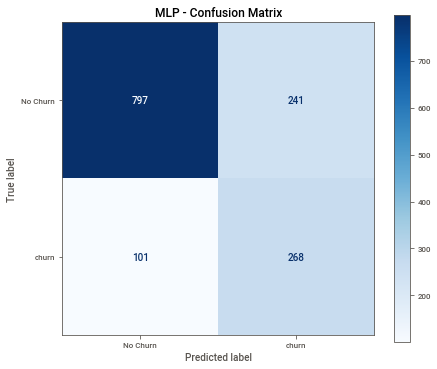

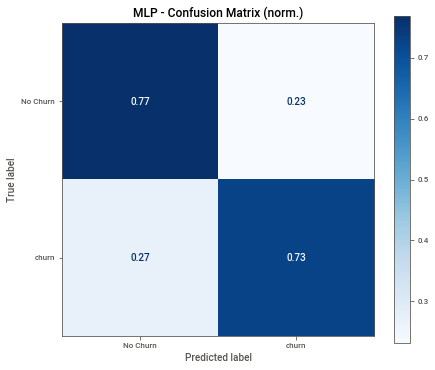

Accuracy Score Test: 0.7547974413646056
Accuracy score Train: 0.8017448856799038(as comparision)



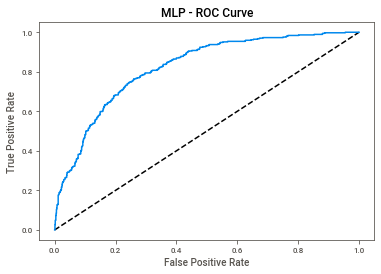

AUC Score (ROC): 0.8222138676107378



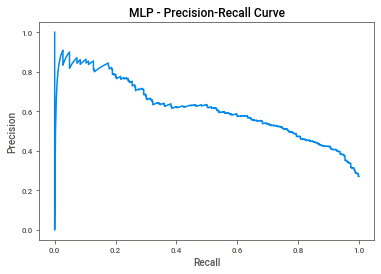

F1 score: 0.5548387096774193 
AUC Score (PR): 0.6137651243431526



In [204]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, clf_mlp, y_pred,'MLP')
roc_curve_auc_score(X_test, y_test, ytest_pred_prob,'MLP')
precision_recall_curve_and_scores(X_test, y_test, y_pred, ytest_pred_prob,'MLP')

# Adaboost

In [113]:
ad_S=AdaBoostClassifier()
ad_S.fit(X_train_Tk,y_train_Tk)

AdaBoostClassifier()

In [114]:
y_pred=ad_S.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[831 207]
 [110 259]]
0.7746979388770433
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1038
           1       0.56      0.70      0.62       369

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.77      0.78      1407

0.7512375268261353


In [205]:
ytrain_pred = ad_S.predict_proba(X_train_Tk)
print('ADA train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred_prob = ad_S.predict_proba(X_test)
print('AdA test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

ADA train roc-auc: 0.8882453427140822
AdA test roc-auc: 0.8244591694471858


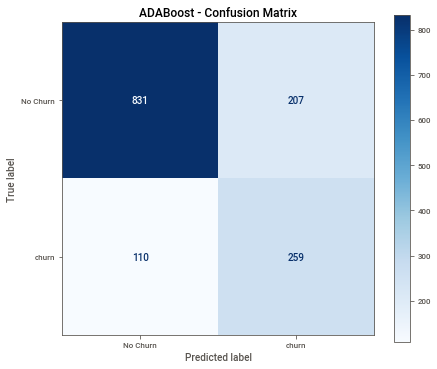

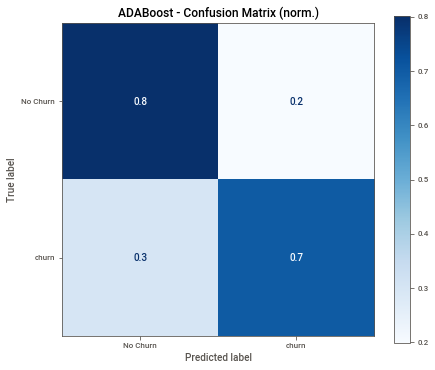

Accuracy Score Test: 0.7547974413646056
Accuracy score Train: 0.8070096269554753(as comparision)



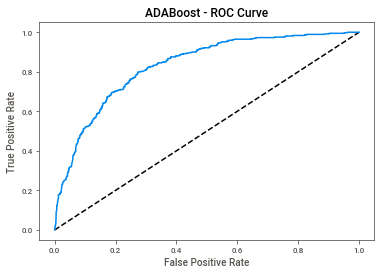

AUC Score (ROC): 0.8308556688649739



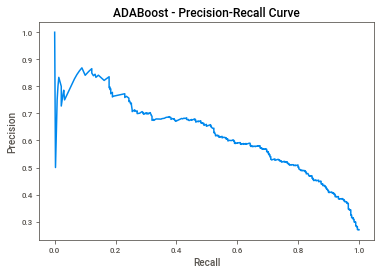

F1 score: 0.5548387096774193 
AUC Score (PR): 0.6259745696126987



In [206]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, ad_S, y_pred,'ADABoost')
roc_curve_auc_score(X_test, y_test, ytest_pred_prob,'ADABoost')
precision_recall_curve_and_scores(X_test, y_test, y_pred, ytest_pred_prob,'ADABoost')

# Gradiant Boosting

In [116]:
gbc_S=GradientBoostingClassifier()
gbc_S.fit(X_train_Tk,y_train_Tk)

GradientBoostingClassifier()

In [117]:
y_pred=gbc_S.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[853 185]
 [124 245]]
0.7803837953091685
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1038
           1       0.57      0.66      0.61       369

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.79      1407

0.7428646396290552


In [118]:
ytrain_pred = gbc_S.predict_proba(X_train_Tk)
print('GrB train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred = gbc_S.predict_proba(X_test)
print('GrB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

GrB train roc-auc: 0.9051723192273632
GrB test roc-auc: 0.8292917900277268


# CatBoost

In [119]:
cbt_S=CatBoostClassifier()

cbt_S.fit(X_train_Tk,y_train_Tk)

Learning rate set to 0.023133
0:	learn: 0.6782118	total: 129ms	remaining: 2m 8s
1:	learn: 0.6653600	total: 134ms	remaining: 1m 6s
2:	learn: 0.6512370	total: 138ms	remaining: 46s
3:	learn: 0.6384658	total: 144ms	remaining: 35.8s
4:	learn: 0.6283253	total: 153ms	remaining: 30.4s
5:	learn: 0.6180494	total: 159ms	remaining: 26.3s
6:	learn: 0.6087513	total: 165ms	remaining: 23.4s
7:	learn: 0.5983996	total: 171ms	remaining: 21.2s
8:	learn: 0.5887152	total: 177ms	remaining: 19.5s
9:	learn: 0.5798479	total: 183ms	remaining: 18.1s
10:	learn: 0.5731638	total: 189ms	remaining: 16.9s
11:	learn: 0.5670274	total: 194ms	remaining: 16s
12:	learn: 0.5607546	total: 197ms	remaining: 15s
13:	learn: 0.5550257	total: 202ms	remaining: 14.2s
14:	learn: 0.5491275	total: 210ms	remaining: 13.8s
15:	learn: 0.5433599	total: 215ms	remaining: 13.2s
16:	learn: 0.5381300	total: 221ms	remaining: 12.8s
17:	learn: 0.5331080	total: 229ms	remaining: 12.5s
18:	learn: 0.5285346	total: 234ms	remaining: 12.1s
19:	learn: 0.5232

In [120]:
y_pred=cbt_S.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[855 183]
 [133 236]]
0.775408670931059
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1038
           1       0.56      0.64      0.60       369

    accuracy                           0.78      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.79      0.78      0.78      1407

0.7316329088146373


In [121]:
ytrain_pred =cbt_S.predict_proba(X_train_Tk)
print('CTB train roc-auc: {}'.format(roc_auc_score(y_train_Tk, ytrain_pred[:,1])))
ytest_pred = cbt_S.predict_proba(X_test)
print('CTB test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

CTB train roc-auc: 0.950987758553847
CTB test roc-auc: 0.8244591694471858


#try svm and Knn

# SVM

In [122]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

In [123]:
svm=SVC()
grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3) 
grid.fit(X_train_Nm_Ov,y_train_Ov) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.634, total=   2.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.622, total=   2.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.654, total=   2.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.671, total=   2.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.662, total=   2.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.771, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.772, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.775, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.803, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  4.2min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [124]:
y_pred=grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[922 116]
 [203 166]]
0.7732764747690121
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1038
           1       0.59      0.45      0.51       369

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407

0.6690555633880039


# KNN

In [125]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [126]:
knn_cl=KNN()
knn_cl = GridSearchCV(knn_cl,hyperparameters)
    
knn_cl.fit(X_train_Nm_Ov,y_train_Ov) 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [127]:
knn_cl.best_params_

{'leaf_size': 1, 'n_neighbors': 4, 'p': 1}

In [129]:
y_pred=knn_cl.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[847 191]
 [154 215]]
0.7547974413646056
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1038
           1       0.53      0.58      0.55       369

    accuracy                           0.75      1407
   macro avg       0.69      0.70      0.69      1407
weighted avg       0.76      0.75      0.76      1407

0.6993240597145856


# ALL SCORES


In [207]:
# the function that prints all scores
def print_scores(headline, y_test, y_pred):
    print(headline)
    acc_score = accuracy_score(y_test, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_test, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_test, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_test, y_pred, average='weighted')
    print("f1_score: ",f_score)
    r_auc_score = roc_auc_score(y_test, y_pred)
    print("roc auc_score: ",r_auc_score)

In [208]:
print_scores("Logistic Regression;",y_test, log_S.predict(X_test))
print_scores("Logistic Regression Imbalace;",y_test, logit.predict(X_test))
print_scores("SVC;",y_test, grid.predict(X_test))
print_scores("KNN;",y_test, knn_cl.predict(X_test))
print_scores("Naive Bayes;",y_test, NB.predict(X_test))
print_scores("Decision Tree;",y_test, ds.predict(X_test))
print_scores("Random Forest;",y_test, rf_model.predict(X_test))
print_scores("CatBoostClassifier;",y_test, cbt_S.predict(X_test))
print_scores("GradientBoostingClassifier;",y_test, gbc_S.predict(X_test))
print_scores("AdaBoostClassifier;",y_test, ad_S.predict(X_test))
print_scores("XGBClassifier;",y_test, random_XGB_Ns.predict(X_test))
print_scores("MLPClassifier;",y_test, clf_mlp.predict(X_test))
print_scores("LGBClassifier;",y_test, gbm.predict(X_test))
print_scores("Ridge Classifier;",y_test, rc.predict(X_test))
print_scores("Bagging Classifier;",y_test, bgc.predict(X_test))

Logistic Regression;
accuracy:  0.7725657427149965
precision:  0.5531453362255966
recall:  0.6910569105691057
f1_score:  0.7798973595737928
roc auc_score:  0.746299168193994
Logistic Regression Imbalace;
accuracy:  0.7910447761194029
precision:  0.6237623762376238
recall:  0.5121951219512195
f1_score:  0.7840027802165642
roc auc_score:  0.7011842661779218
SVC;
accuracy:  0.7732764747690121
precision:  0.5886524822695035
recall:  0.44986449864498645
f1_score:  0.7626863731922974
roc auc_score:  0.6690555633880039
KNN;
accuracy:  0.7547974413646056
precision:  0.5295566502463054
recall:  0.5826558265582655
f1_score:  0.7584259225183211
roc auc_score:  0.6993240597145856
Naive Bayes;
accuracy:  0.7391613361762616
precision:  0.5018450184501845
recall:  0.7371273712737128
f1_score:  0.7520718218819371
roc auc_score:  0.7385058821686483
Decision Tree;
accuracy:  0.7540867093105899
precision:  0.5274463007159904
recall:  0.5989159891598916
f1_score:  0.7588540588596233
roc auc_score:  0.7040

In [209]:
from sklearn.ensemble import VotingClassifier 
from sklearn.model_selection import cross_val_score

In [210]:
recal=make_scorer(recall_score)

# Voting Classifier

In [211]:
clf1= AdaBoostClassifier()
clf2= LogisticRegression()
clf3= MLPClassifier(verbose=0)
clf4= RandomForestClassifier()



print('5-fold cross validation:/n')
labels = ['AdaBoost','Logistic Regression','MLP','random Forest']

for clf, label in zip([clf1,clf2,clf3,clf4],labels):
    scores =cross_val_score(clf,X_train_Tk,y_train_Tk,cv=5,scoring='recall')
    
    print("Accuracy: %0.2f (+/- %0.2f)[%s]"
         %(scores.mean(),scores.std(), label))

5-fold cross validation:/n
Accuracy: 0.77 (+/- 0.06)[AdaBoost]


C:\Users\Soumit\anaconda3\envs\C_churn\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Soumit\anaconda3\envs\C_churn\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Accuracy: 0.76 (+/- 0.06)[Logistic Regression]
Accuracy: 0.77 (+/- 0.07)[MLP]
Accuracy: 0.78 (+/- 0.10)[random Forest]


In [213]:
voting_clf_hard =  VotingClassifier(estimators = [(labels[0], clf1),
                                                  (labels[1], clf2),
                                       (labels[2], clf3),(labels[3], clf4)],
                                       
                                                 
                                    voting = 'hard')

In [214]:
voting_clf_hard.fit(X_train_Tk, y_train_Tk)

C:\Users\Soumit\anaconda3\envs\C_churn\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()),
                             ('Logistic Regression', LogisticRegression()),
                             ('MLP', MLPClassifier(verbose=0)),
                             ('random Forest', RandomForestClassifier())])

In [215]:
y_pred=voting_clf_hard.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[868 170]
 [137 232]]
0.7818052594171997
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1038
           1       0.58      0.63      0.60       369

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.73      1407
weighted avg       0.79      0.78      0.78      1407

0.7324748970033053


In [216]:
voting_clf_soft = VotingClassifier(estimators = [(labels[0], clf1),
                                                  (labels[1], clf2),
                                                  (labels[2], clf3),
                                                  (labels[3], clf4)],
                                                  
                                                  
                                    voting = 'soft')

In [217]:
voting_clf_soft.fit(X_train_Tk, y_train_Tk)

C:\Users\Soumit\anaconda3\envs\C_churn\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()),
                             ('Logistic Regression', LogisticRegression()),
                             ('MLP', MLPClassifier(verbose=0)),
                             ('random Forest', RandomForestClassifier())],
                 voting='soft')

In [218]:
y_pred=voting_clf_soft.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[826 212]
 [116 253]]
0.7668798862828714
              precision    recall  f1-score   support

           0       0.88      0.80      0.83      1038
           1       0.54      0.69      0.61       369

    accuracy                           0.77      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.77      0.77      1407

0.7406989676833184


In [220]:
ytest_pred_prob = voting_clf_soft.predict_proba(X_test)
print('Voting_soft test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Voting_soft test roc-auc: 0.8253546793656761


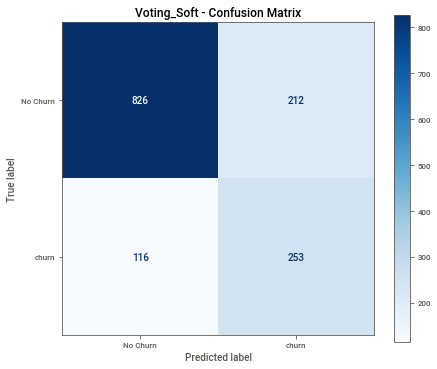

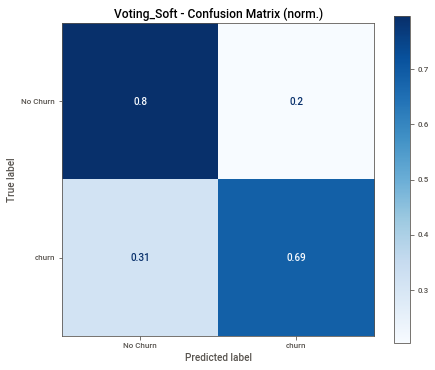

Accuracy Score Test: 0.7668798862828714
Accuracy score Train: 0.8804151624548736(as comparision)



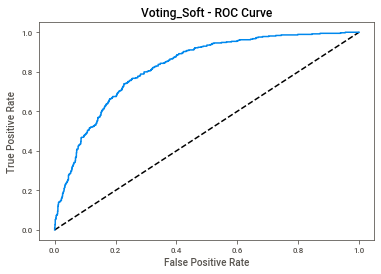

AUC Score (ROC): 0.8253546793656761



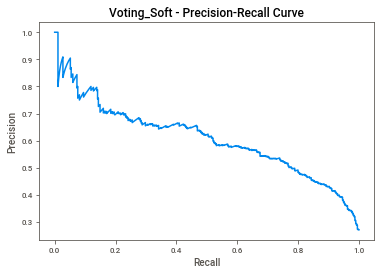

F1 score: 0.6067146282973621 
AUC Score (PR): 0.6070231548826216



In [221]:
#plot Model evaluation
confusion_matrix_plot(X_train_Tk, y_train_Tk, X_test, y_test, voting_clf_soft, y_pred,'Voting_Soft')
roc_curve_auc_score(X_test, y_test, ytest_pred_prob,'Voting_Soft')
precision_recall_curve_and_scores(X_test, y_test, y_pred, ytest_pred_prob,'Voting_Soft')

Save Random Forest Model

In [222]:
pickle.dump(rf_model, open('Model.pkl','wb'))

In [223]:
import eli5
from eli5.sklearn import PermutationImportance

from pdpbox import pdp, info_plots

C:\Users\Soumit\anaconda3\envs\C_churn\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Soumit\anaconda3\envs\C_churn\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [224]:
perm = PermutationImportance(rf_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top = 19)

Weight,Feature
0.0144 ± 0.0077,Contract_One year
0.0057 ± 0.0056,OnlineSecurity_Yes
0.0041 ± 0.0034,OnlineBackup_Yes
0.0036 ± 0.0067,InternetService_Fiber optic
0.0031 ± 0.0037,PaperlessBilling
0.0024 ± 0.0069,TechSupport_Yes
0.0018 ± 0.0069,PaymentMethod_Mailed check
0.0018 ± 0.0057,Contract_Two year
0.0017 ± 0.0076,InternetService_No
0.0014 ± 0.0050,Dependents


# partial dependence plot

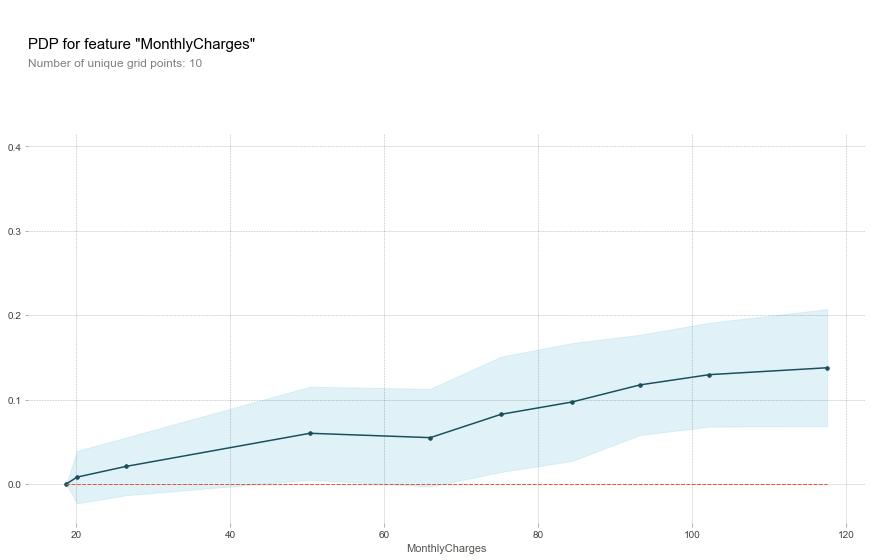

In [225]:
pdp_p = pdp.pdp_isolate(model=rf_model, dataset=X_test, model_features=X_test.columns.values, feature='MonthlyCharges')
pdp.pdp_plot(pdp_p, 'MonthlyCharges')
plt.show()

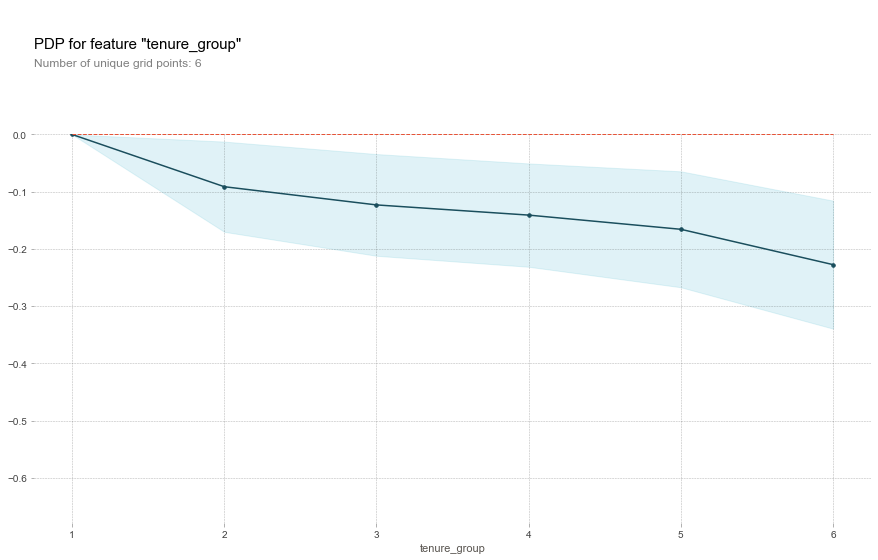

In [226]:
pdp_p = pdp.pdp_isolate(model=rf_model, dataset=X_test, model_features=X_test.columns.values, feature='tenure_group')
pdp.pdp_plot(pdp_p, 'tenure_group')
plt.show()

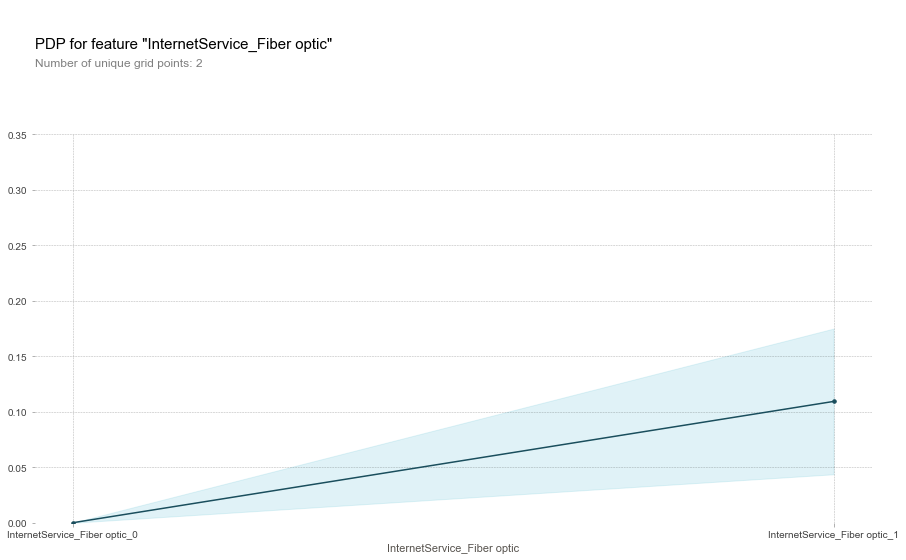

In [227]:
pdp_p = pdp.pdp_isolate(model=rf_model, dataset=X_test, model_features=X_test.columns.values, feature='InternetService_Fiber optic')
pdp.pdp_plot(pdp_p, 'InternetService_Fiber optic')
plt.show()

In [228]:
X_test.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling',
       'MonthlyCharges', 'tenure_group', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [229]:
import shap
shap.initjs()

In [236]:
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(np.array(X_test.iloc[0]))
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0])

In [237]:
import joblib

In [238]:
# Saving Explainer
ex_filename = 'explainer.bz2'
joblib.dump(explainer, filename=ex_filename, compress=('bz2', 9))

['explainer.bz2']

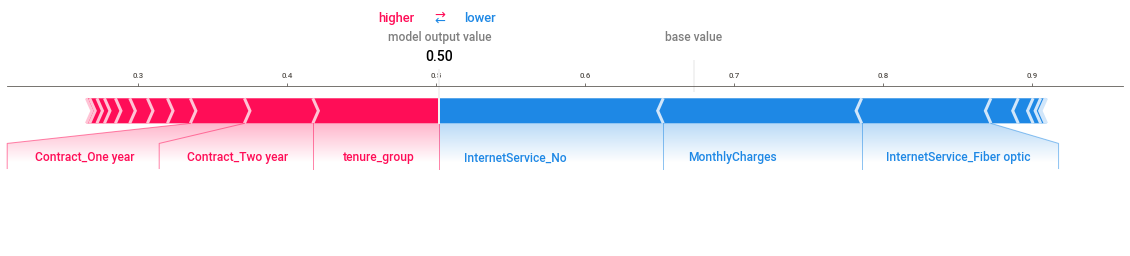

In [239]:
explainer = joblib.load(filename="explainer.bz2")
shap_values = explainer.shap_values(np.array(X_test.iloc[0]))
shap.force_plot(explainer.expected_value[1], shap_values[1], list(X_test.columns), 
                matplotlib = True, show = False).savefig('shap.png', bbox_inches="tight")

# Dial Chart

In [240]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

def gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
          colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], Probability=1, fname=False): 
    
    N = len(labels)
    colors = colors[::-1]
        

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(4)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, 'Churn Probability ' + np.round(Probability,2).astype(str), horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = (1-Probability)*180
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

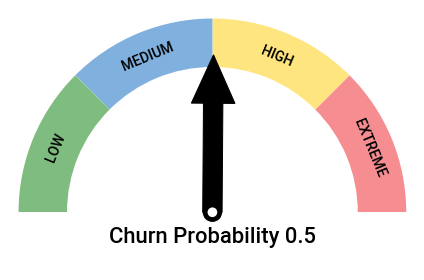

In [241]:
gauge(Probability=rf_model.predict_proba(X_test.iloc[0:1])[0,1])